# Plot one 2D map as an image:

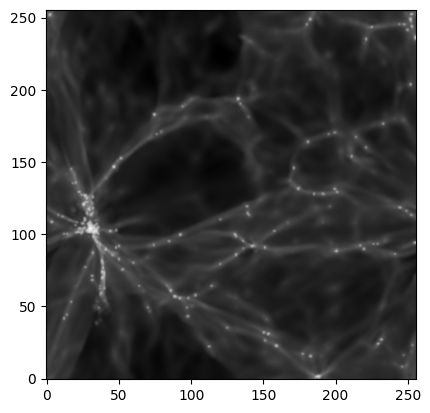

Value of the parameters for this map
Omega_m: 0.10000
sigma_8: 0.80000
A_SN1:   3.60000
A_AGN1:  1.00000
A_SN2:   7.40000
A_AGN2:  20.00000


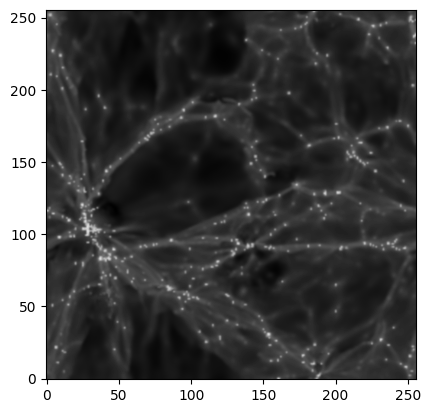

Value of the parameters for this map
Omega_m: 0.20000
sigma_8: 0.80000
A_SN1:   3.60000
A_AGN1:  1.00000
A_SN2:   7.40000
A_AGN2:  20.00000


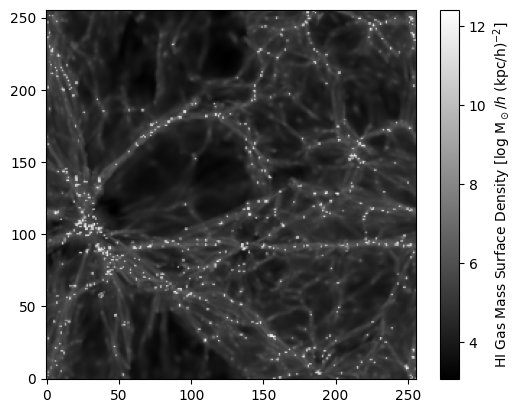

Value of the parameters for this map
Omega_m: 0.30000
sigma_8: 0.80000
A_SN1:   3.60000
A_AGN1:  1.00000
A_SN2:   7.40000
A_AGN2:  20.00000


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from data_storage import params, maps_1p_TNG


#pick a map number
map_number = 1

#find the parameters that correspond to the 3D box that this 2D map comes from
params_map = params[map_number//15]
# This is good for selecting a good map for showing representatuon
plt.imshow(np.log10(maps_1p_TNG[map_number]),cmap=plt.get_cmap('binary_r'), origin='lower', interpolation='bicubic')
plt.show()
print('Value of the parameters for this map')
print('Omega_m: %.5f'%params_map[0])
print('sigma_8: %.5f'%params_map[1])
print('A_SN1:   %.5f'%params_map[2])
print('A_AGN1:  %.5f'%params_map[3])
print('A_SN2:   %.5f'%params_map[4])
print('A_AGN2:  %.5f'%params_map[5])

map_number += 15
params_map = params[map_number//15]

plt.imshow(np.log10(maps_1p_TNG[map_number]),cmap=plt.get_cmap('binary_r'), origin='lower', interpolation='bicubic')
plt.show()
print('Value of the parameters for this map')
print('Omega_m: %.5f'%params_map[0])
print('sigma_8: %.5f'%params_map[1])
print('A_SN1:   %.5f'%params_map[2])
print('A_AGN1:  %.5f'%params_map[3])
print('A_SN2:   %.5f'%params_map[4])
print('A_AGN2:  %.5f'%params_map[5])

map_number +=15
params_map = params[map_number//15]

plt.imshow(np.log10(maps_1p_TNG[map_number]),cmap=plt.get_cmap('binary_r'), origin='lower')
plt.colorbar(label='HI Gas Mass Surface Density [log M$_\odot/h$ (kpc/h)$^{-2}$]')
plt.show()
print('Value of the parameters for this map')
print('Omega_m: %.5f'%params_map[0])
print('sigma_8: %.5f'%params_map[1])
print('A_SN1:   %.5f'%params_map[2])
print('A_AGN1:  %.5f'%params_map[3])
print('A_SN2:   %.5f'%params_map[4])
print('A_AGN2:  %.5f'%params_map[5])

## Next we will take two maps with a different $\Omega_m$ and take the difference, to see how changing the matter density of the Universe impacts on the distribution of HI gas.

## We will want to compare the same "slice" but with different parameters, therefore we need to "jump" at least 15 in the map index. 

Value of the parameters for map1
Omega_m: 0.10000
sigma_8: 0.80000
A_SN1:   3.60000
A_AGN1:  1.00000
A_SN2:   7.40000
A_AGN2:  20.00000
Value of the parameters for map2
Omega_m: 0.30000
sigma_8: 0.80000
A_SN1:   3.60000
A_AGN1:  1.00000
A_SN2:   7.40000
A_AGN2:  20.00000


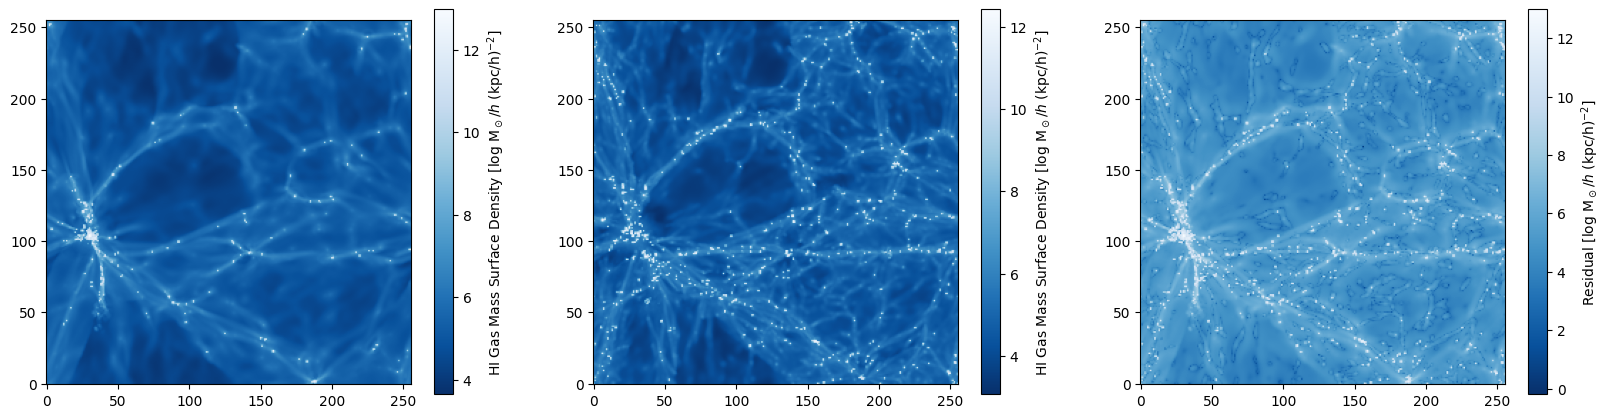

In [6]:
# residual between two maps
map1 = 1 #pick a map
params_map1 = params[(map1//15)]

map2 = map1+15*2 #pick a map that corresponds to the same slice but with a different parameter. 
params_map2 = params[(map2//15)]

#take the absolute difference between the two maps
diff = abs(maps_1p_TNG[map1]-maps_1p_TNG[map2])
np.shape(diff)

#show both maps and the residuals
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

im1 = axs[0].imshow(np.log10(maps_1p_TNG[map1]),cmap=plt.get_cmap('Blues_r'), origin='lower')
fig.colorbar(im1, ax=axs[0],label='HI Gas Mass Surface Density [log M$_\odot/h$ (kpc/h)$^{-2}$]')

#print the values of the parameters to make sure we're varying what we want to vary
print('Value of the parameters for map1')
print('Omega_m: %.5f'%params_map1[0])
print('sigma_8: %.5f'%params_map1[1])
print('A_SN1:   %.5f'%params_map1[2])
print('A_AGN1:  %.5f'%params_map1[3])
print('A_SN2:   %.5f'%params_map1[4])
print('A_AGN2:  %.5f'%params_map1[5])

im2 = axs[1].imshow(np.log10(maps_1p_TNG[map2]),cmap=plt.get_cmap('Blues_r'), origin='lower')
fig.colorbar(im2, ax=axs[1], label='HI Gas Mass Surface Density [log M$_\odot/h$ (kpc/h)$^{-2}$]')
print('Value of the parameters for map2')
print('Omega_m: %.5f'%params_map2[0])
print('sigma_8: %.5f'%params_map2[1])
print('A_SN1:   %.5f'%params_map2[2])
print('A_AGN1:  %.5f'%params_map2[3])
print('A_SN2:   %.5f'%params_map2[4])
print('A_AGN2:  %.5f'%params_map2[5])

im3 = axs[2].imshow(np.log10(diff),cmap=plt.get_cmap('Blues_r'), origin='lower')
fig.colorbar(im3, ax=axs[2], label='Residual [log M$_\odot/h$ (kpc/h)$^{-2}$]' )

#save to PDF
plt.savefig("test-image.pdf", format="pdf", bbox_inches="tight")

# next i want to plot them in sections side by side
# Eg, omegam, sigma8 this will be one section 
# then plot AGN1 res next to SN1 res 
# then plot AGN2 res next to SN2 res
# but importantly I want to analyse increases and decreases using bsolutes and non absolutes 